## Import Libraries

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

Load the train and test subsets of the mnist dataset from Keras

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



## Data Pre-Processing


*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [ ]:
# Preprocess the data

# Adjust the input shape to match the one the model is expecting
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape)
# Normalize the values of the pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

#Turn labels into categories using the to_categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 28, 28, 1)


## Build and train a CNN




*   input shape
*   activation function at the output layer
*   number of output neurons



In [ ]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))





Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 20)


Epoch 1/10
3000/3000 [==============================] - 40s 13ms/step - loss: 0.1274 - accuracy: 0.9609 - precision: 0.9740 - recall: 0.9503 - val_loss: 0.0504 - val_accuracy: 0.9841 - val_precision: 0.9861 - val_recall: 0.9823
Epoch 2/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0430 - accuracy: 0.9870 - precision: 0.9886 - recall: 0.9858 - val_loss: 0.0495 - val_accuracy: 0.9850 - val_precision: 0.9862 - val_recall: 0.9839
Epoch 3/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0299 - accuracy: 0.9906 - precision: 0.9915 - recall: 0.9899 - val_loss: 0.0382 - val_accuracy: 0.9881 - val_precision: 0.9895 - val_recall: 0.9874
Epoch 4/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.0221 - accuracy: 0.9930 - precision: 0.9934 - recall: 0.9926 - val_loss: 0.0314 - val_accuracy: 0.9898 - val_precision: 0.9909 - val_recall: 0.9893
Epoch 5/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0171 - a

## Evaluate the Model's performance

Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 6ms/step - loss: 0.0404 - accuracy: 0.9904 - precision: 0.9908 - recall: 0.9903
Test Accuracy: 0.9904000163078308


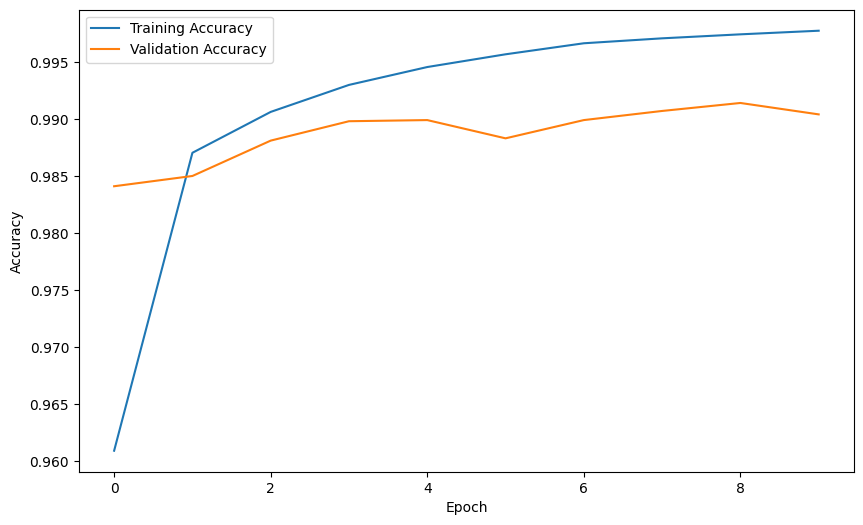

In [ ]:
# Evaluate the model on the test set
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)[0],model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
